In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

N = 100
x = np.random.rand(N) * 6 - 3  # [-3,3)
x.sort()
y = np.sin(x) + np.random.randn(N) * 0.05
print y
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的
print x

[-0.16330414 -0.30350217 -0.40735928 -0.37936023 -0.42864337 -0.43090604
 -0.66332137 -0.60769558 -0.6857086  -0.68493376 -0.66828153 -0.77881889
 -0.70364842 -0.79764008 -0.78034598 -0.75539007 -0.77968221 -0.86017712
 -0.87413556 -0.84858909 -0.88153594 -1.00656412 -0.81588523 -0.97001074
 -1.0496901  -0.97728332 -0.9991629  -1.02203789 -1.02813402 -0.9713307
 -0.96052119 -0.96437284 -0.92401996 -0.87211232 -0.91448995 -0.93647616
 -0.87867346 -0.80937088 -0.81270223 -0.74573827 -0.7309771  -0.62622358
 -0.6005219  -0.48375404 -0.3287453  -0.47363669 -0.27950732 -0.33437481
 -0.33401267 -0.28090778 -0.35714014 -0.19296531 -0.03798584 -0.05057446
  0.12757483  0.12269329  0.17581181  0.43140258  0.54771014  0.46479358
  0.68157413  0.6372827   0.57479808  0.62626213  0.75505139  0.73568116
  0.75379286  0.76429155  0.73124856  0.83972629  0.90957527  0.97849452
  1.01827874  0.98192841  0.92531686  0.8807788   0.96913585  0.96050457
  0.93546401  0.99312196  0.8422073   0.90583247  0.

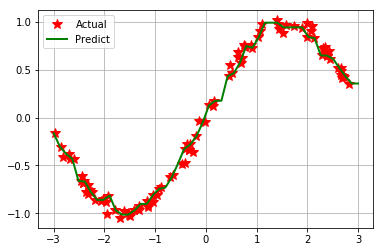

In [2]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=9)
dt.fit(x, y)
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
y_hat = dt.predict(x_test)
plt.plot(x, y, 'r*', ms=10, label='Actual')
plt.plot(x_test, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()

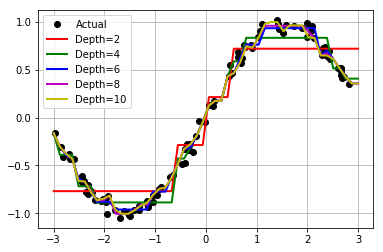

In [3]:
# 比较决策树的深度影响
depth = [2, 4, 6, 8, 10]
clr = 'rgbmy'
dtr = DecisionTreeRegressor(criterion='mse')
plt.plot(x, y, 'ko', ms=6, label='Actual')
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
for d, c in zip(depth, clr):
    dtr.set_params(max_depth=d)
    dtr.fit(x, y)
    y_hat = dtr.predict(x_test)
    plt.plot(x_test, y_hat, '-', color=c, linewidth=2, label='Depth=%d' % d)
plt.legend(loc='upper left')
plt.grid(b=True)
plt.show()

In [9]:
N = 400
x = np.random.rand(N) * 8 - 4  # [-4,4)
x.sort()
print x
print '===================='

[-3.96135874 -3.93854372 -3.93308952 -3.88710759 -3.86720768 -3.85017271
 -3.82256502 -3.80159949 -3.79757589 -3.79434966 -3.76370175 -3.7584551
 -3.75672233 -3.75132876 -3.74363974 -3.72665606 -3.72610732 -3.71491385
 -3.68658389 -3.64343929 -3.63804663 -3.62920452 -3.60303486 -3.59888523
 -3.58676462 -3.57955223 -3.5580135  -3.54956165 -3.47946481 -3.45257634
 -3.42902515 -3.39716282 -3.39681232 -3.36930501 -3.3621555  -3.35000136
 -3.34297119 -3.32897142 -3.284076   -3.27131394 -3.26131189 -3.24494261
 -3.2057028  -3.17521735 -3.15336386 -3.14583421 -3.11278625 -3.10040649
 -3.07694431 -3.07640639 -3.0678292  -3.04051407 -3.02860048 -3.02147014
 -3.01475463 -2.9573282  -2.88445946 -2.8653897  -2.81878409 -2.81504786
 -2.79585111 -2.75651752 -2.729219   -2.7210223  -2.71499288 -2.68974244
 -2.66050379 -2.65953963 -2.65308468 -2.62584153 -2.57311424 -2.56529674
 -2.51047719 -2.5044663  -2.4189174  -2.41665445 -2.39047629 -2.3860702
 -2.34752438 -2.33688714 -2.30039136 -2.27662318 -2.2

In [10]:
# y1 = np.sin(x) + 3 + np.random.randn(N) * 0.1
# y2 = np.cos(0.3*x) + np.random.randn(N) * 0.01
# y1 = np.sin(x) + np.random.randn(N) * 0.05
# y2 = np.cos(x) + np.random.randn(N) * 0.1
y1 = 16 * np.sin(x) ** 3 + np.random.randn(N)
y2 = 13 * np.cos(x) - 5 * np.cos(2 * x) - 2 * np.cos(3 * x) - np.cos(4 * x) + 0.1 * np.random.randn(N)
np.set_printoptions(suppress=True)
print y1
print y2
y = np.vstack((y1, y2)).T
print y
print 'Data = \n', np.vstack((x, y1, y2)).T
print '================='
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的
deep = 8
reg = DecisionTreeRegressor(criterion='mse', max_depth=deep)
dt = reg.fit(x, y)

x_test = np.linspace(-4, 4, num=1000).reshape(-1, 1)
print x_test
y_hat = dt.predict(x_test)
print y_hat

[  5.06484831   5.68278047   3.94900628   5.50303699   3.69939077
   3.00073603   2.96655801   3.23058379   1.97278182   3.27040907
   4.9795259    4.65205051   4.61032603   2.04396104   2.56435526
   2.89737742   3.14132253   3.46629011   2.81154352   1.54147752
   4.57486058   0.77887039   1.56549951  -0.06996933   2.51515172
   1.88418264   2.62925986   0.05477663   1.35775814  -0.00871512
  -2.07311906   1.69866313   1.8220111    2.19269598  -1.21066006
  -1.26890738   0.41994529   1.29101311  -1.03943921  -0.2326954
   0.14839659   1.72915946  -1.56485463   0.30147314   0.66781455
  -1.25263955  -0.65845353  -1.06066604   0.82245947  -1.78138319
   0.08373148   0.86540179  -1.23117534  -0.09620475   1.63845399
   0.14331449  -1.40395599   0.43003321  -0.39474664  -2.19988135
   0.31230987  -1.9220176   -1.15436639   0.61479553  -3.87728794
  -1.26907135  -1.23792001  -0.69873448  -2.49037681  -3.34696853
  -3.14062475  -0.47336935  -4.57842305  -2.43968163  -6.37478633
  -5.035367

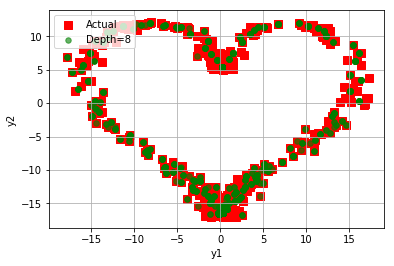

In [11]:
plt.scatter(y[:, 0], y[:, 1], c='r', marker='s', s=60, label='Actual')
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='o', edgecolors='g', s=30, label='Depth=%d' % deep, alpha=0.6)
plt.legend(loc='upper left')
plt.xlabel('y1')
plt.ylabel('y2')
plt.grid()
plt.show()